In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("dataset/La Liga.csv")
df2 = pd.read_csv("dataset/Bundesliga.csv")
df3 = pd.read_csv("dataset/Serie A.csv")
df4 = pd.read_csv("dataset/English Championship.csv")

In [62]:
df=df.append(df2, ignore_index=True)
df=df.append(df3, ignore_index=True)
df=df.append(df4, ignore_index=True)

In [63]:
df=df.drop(columns=["Clubs"])

In [64]:
df["Matches won"].replace("-", 0, inplace=True)
df["Matches lost"].replace("-", 0, inplace=True)
df["Matches drawn"].replace("-", 0, inplace=True)
df

,Matches played,Matches won,Matches drawn,Matches lost,Goals for,Goals against,Goal difference,Points
0,8,5,1,2,18,8,10,16
1,8,4,3,1,9,4,5,15
2,8,4,2,2,12,7,5,14
3,8,4,2,2,11,7,4,14
4,8,4,2,2,11,8,3,14
5,8,3,4,1,19,10,9,13
6,8,3,4,1,8,6,2,13
7,8,3,3,2,5,6,-1,12
8,8,3,2,3,12,11,1,11
9,8,2,4,2,13,12,1,10


In [65]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
regressor = DecisionTreeRegressor(max_depth=10)

In [69]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
y_pred = regressor.predict(X_test)

In [71]:
#str(y_pred[3]).split(".")[1]
for a,b in zip(y_test, y_pred):
    print(a, "|", b)

10 | 9.0
14 | 14.0
19 | 18.0
14 | 14.0
11 | 10.0
14 | 14.0
16 | 15.0
9 | 7.0
9 | 9.0
7 | 7.0
8 | 8.0
10 | 9.0
14 | 14.0
15 | 16.0
6 | 7.0
13 | 9.0
2 | 5.0


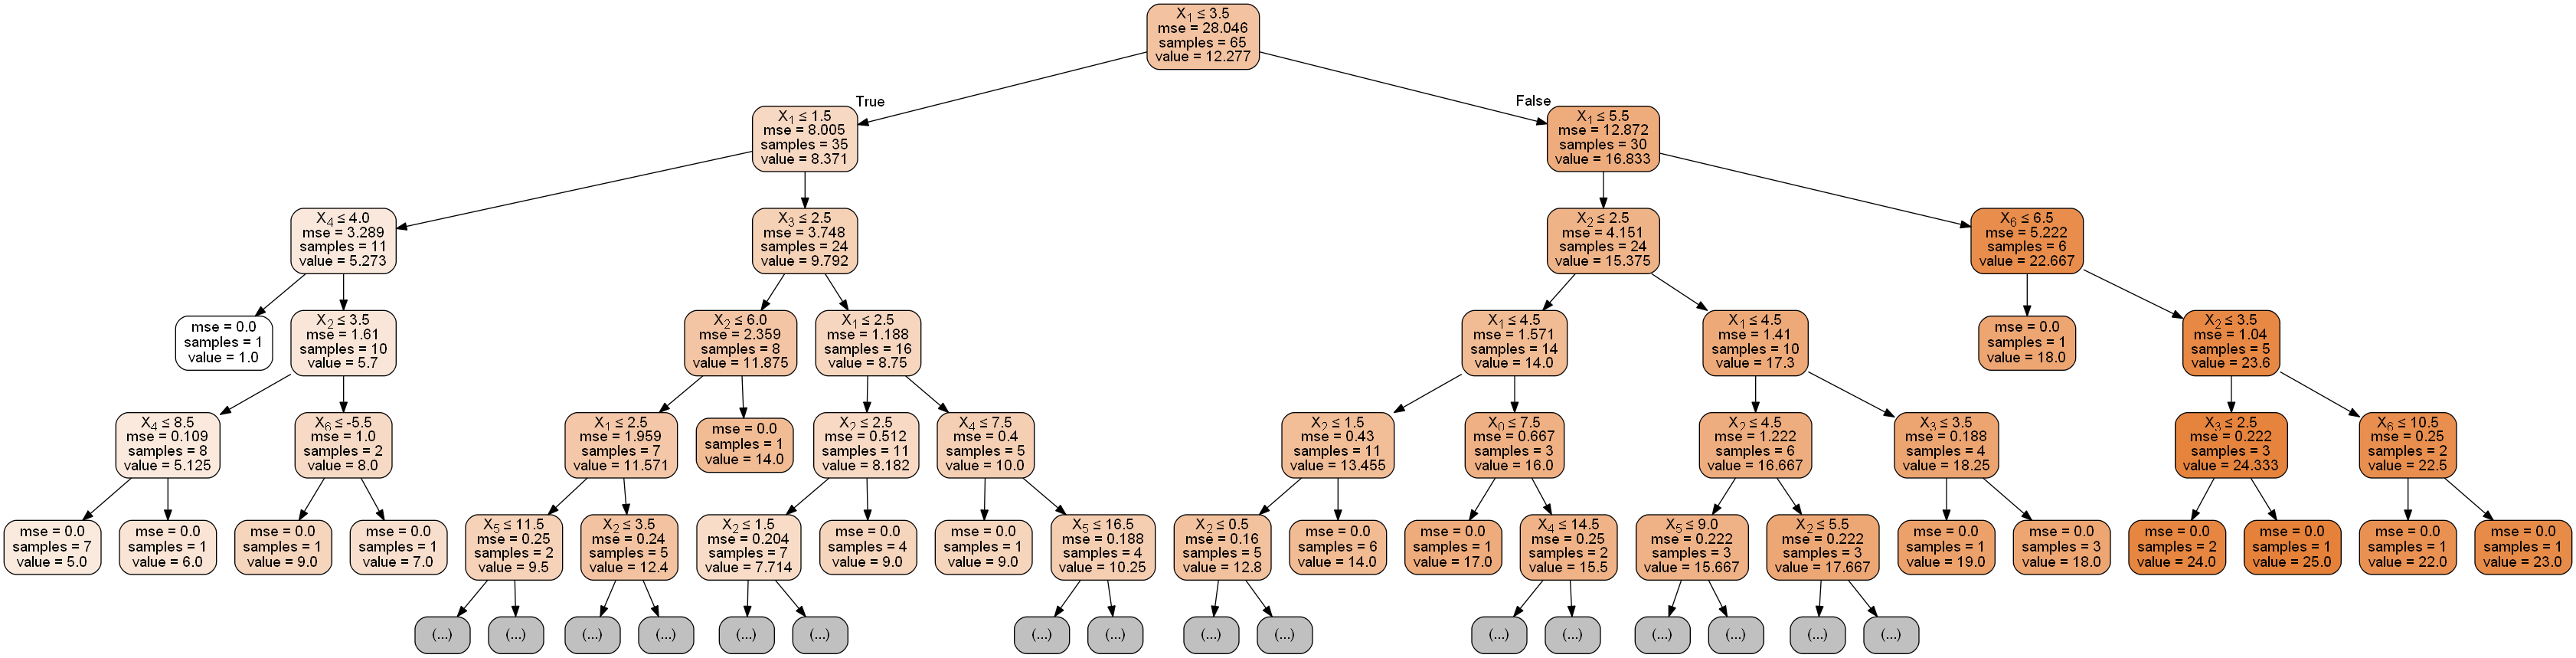

In [72]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())